In [5]:
# The following is necessary to run the cells that follow. Run this cell once at the beginning
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append("../../")
sys.path.append("../")
plt.rcParams["figure.figsize"] = [12, 7]


# A gc_event_dataframe has the following columns
> ## DateTime

> ## TimeFromStart_seconds

> ## EventType

> ## EventName

> ## AdditionalEventInfo

> ## MemoryChange_MB

> ## Duration_miliseconds

In [24]:
                        # Fill in the following 3 variables
################################################################################################
files = ["../../datasets/long/ZGC_long.log", "../../datasets/long/ShenandoahGC_long.log", "../../datasets/long/ParallelGC_long.log"] 
labels = ["ZGC Short", "Shenandoah Short", "ParallelGC"]
# time_range_seconds = [0, 100]
time_range_seconds = None  # includes full log
################################################################################################
from src.compare_logs import get_parsed_comparions_from_files 
gc_event_dataframes = get_parsed_comparions_from_files(files, time_range_seconds)

## How to use filter_by and group_by

> ### `filter_by` : list of tuples -> (col, val), where column is a column in the gc_event_dataframe, and val is the EXACT value each row must match to remain in the dataset. Setting val = None means ANY non "None" value will remain in the dataset. 
> Example: `filter_by = [("EventType", "Pause")]` #     Only looks at rows that represent a Pause

> Example: `filter_by = [("HeapBeforeGC", None), ("HeapAfterGC", None)]` # Only looks at rows that include allocation for both Before & After gc

<br />

> ### `group_by` string, representing a column in the gc_event_dataframe. For each unique value in each log, a new group is created and independently plotted. leaving group_by = None means all data after filters shall be a group
> Example: `group_by "EventName"` 

## Compare STW pauses during runtime

Text(0, 0.5, 'Pause duration in miliseconds')

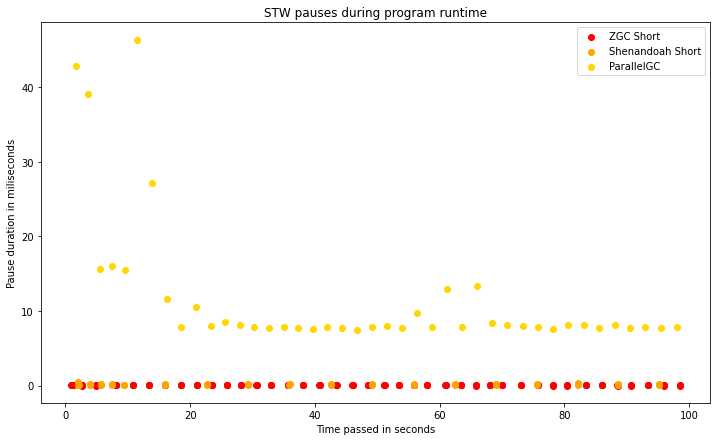

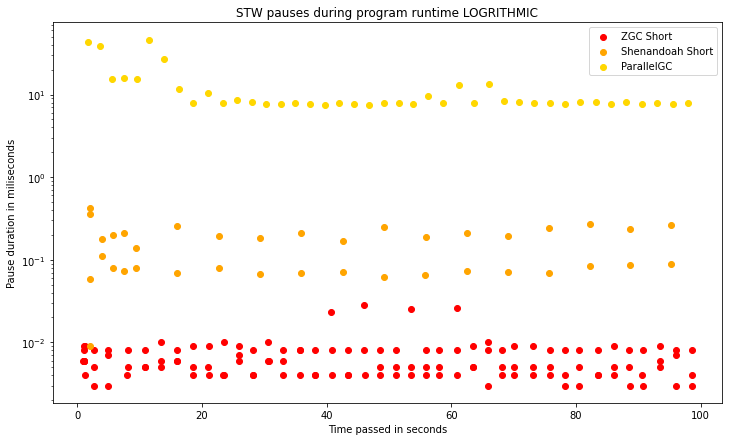

In [25]:
from new_graphing import scatter

# Chart #1, linear Y axis
graph = scatter(gc_event_dataframes, group_by = None, filter_by = [("EventType", "Pause")], labels=labels)
_ = graph.set_title("STW pauses during program runtime")
graph.set_xlabel("Time passed in seconds")
graph.set_ylabel("Pause duration in miliseconds")

############################################################################################################

# Chart #2, logritmic Y axos
graph = scatter(gc_event_dataframes, group_by = None, filter_by = [("EventType", "Pause")], labels = labels)
graph.set_yscale("log") # LOGRITHMIC
_ = graph.set_title("STW pauses during program runtime LOGRITHMIC")
graph.set_xlabel("Time passed in seconds")
graph.set_ylabel("Pause duration in miliseconds")

## Concurrent durations during runtime

Text(0, 0.5, 'Concurrent durations in miliseconds')

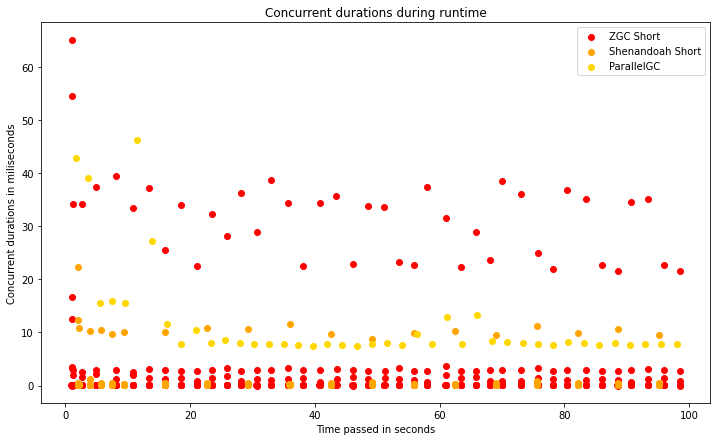

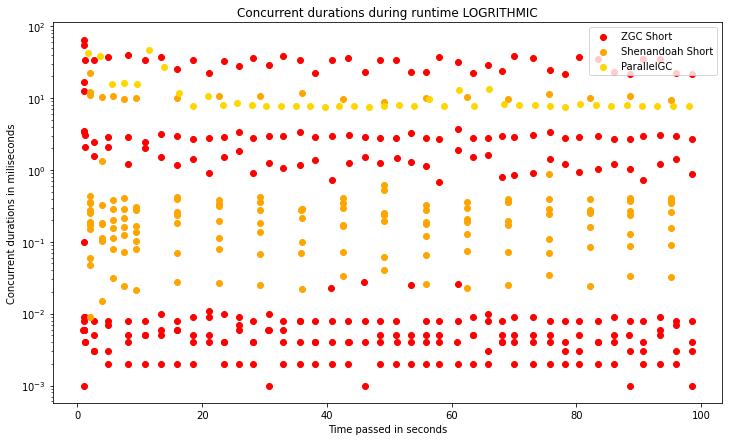

In [26]:
from new_graphing import scatter
# Linear graph
graph = scatter(gc_event_dataframes, labels=labels)
_ = graph.set_title("Concurrent durations during runtime")
graph.set_xlabel("Time passed in seconds")
graph.set_ylabel("Concurrent durations in miliseconds")

# Logrithmic Graph
graph = scatter(gc_event_dataframes, labels=labels)
graph.set_yscale("log") # LOGRITHMIC
_ = graph.set_title("Concurrent durations during runtime LOGRITHMIC")
graph.set_xlabel("Time passed in seconds")
graph.set_ylabel("Concurrent durations in miliseconds")

## Time spent in STW vs. Concurrent

['ZGC Short', 'Shenandoah Short', 'ParallelGC']


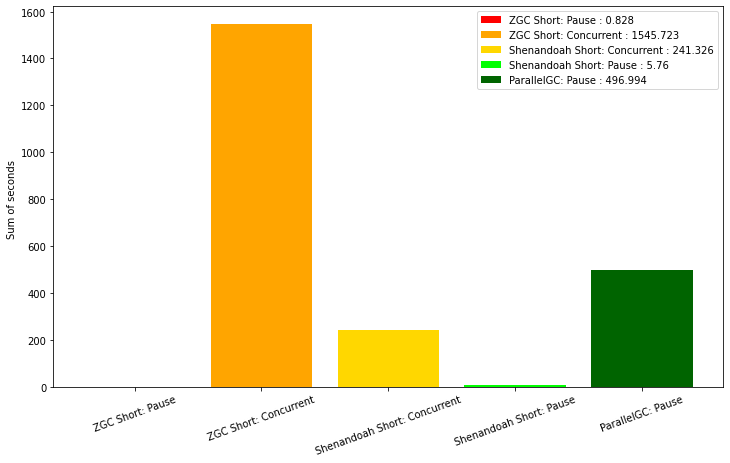

In [27]:
from new_graphing import bar_sum
print(labels)
graph = bar_sum(gc_event_dataframes, group_by = "EventType", filter_by = [("Duration_miliseconds", None)], labels= labels)
_ = graph.set_title = "Sum of event durations in miliseconds"
_ = graph.set_ylabel("Sum of seconds ")
_ = plt.xticks(rotation = 20)


## Comparing Trends within the data

In [28]:
from new_graphing import trends
print("\t\t\tPauses during runtime\n------------------------------------------------------------------------------------------------------------------")
trends(gc_event_dataframes, 
       filter_by = [("EventType", "Pause")], 
       labels= labels,
       throughput=True)
print("\n\n\n")

print("\t\t\tPauses by name during runtime\n------------------------------------------------------------------------------------------------------------------")
trends(gc_event_dataframes, 
       group_by = "EventName",
       filter_by= [("EventType", "Pause")] ,
       labels= labels)


			Pauses during runtime
------------------------------------------------------------------------------------------------------------------
 Trends (ms)            | Event Count  | Max Duration | Sum Duration | Mean Duration| Std Dev.     | Throughput   |
-------------------------------------------------------------------------------------------------------------------
ZGC Short               | 126          | 0.028        | 0.828        | 0.0066       | 0.004        | 100.0%       | 
Shenandoah Short        | 38           | 0.427        | 5.76         | 0.1516       | 0.0931       | 99.99%       | 
ParallelGC              | 42           | 46.344       | 496.994      | 11.8332      | 9.3298       | 99.49%       | 




			Pauses by name during runtime
------------------------------------------------------------------------------------------------------------------
 Trends (ms)            | Event Count  | Max Duration | Sum Duration | Mean Duration| Std Dev.     |
------------------------

## Percentiles of event durations

In [29]:
from new_graphing import percentiles
print("\t\t\tPauses during runtime\n----------------------------------------------------------------------------------")
percentiles(gc_event_dataframes, 
       filter_by = [("EventType", "Pause")], 
       labels= labels)

print("\n\n")

print("\t\t\tPauses during runtime by name\n----------------------------------------------------------------------------------")
percentiles(gc_event_dataframes, 
       group_by = "EventName",
       filter_by= [("EventType", "Pause")] ,
       labels= labels)

# TODO: fix the printing of the second table's TITLES

			Pauses during runtime
----------------------------------------------------------------------------------
Percentiles| 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
------------------------------------------------------------------------------------------------
ZGC Short  | 0.01 ms   | 0.01 ms   | 0.01 ms   | 0.01 ms   | 0.03 ms   | 0.03 ms   | 0.03 ms   | 
Shenandoah | 0.12 ms   | 0.21 ms   | 0.26 ms   | 0.29 ms   | 0.4 ms    | 0.42 ms   | 0.43 ms   | 
ParallelGC | 7.97 ms   | 10.31 ms  | 15.97 ms  | 38.51 ms  | 44.9 ms   | 46.2 ms   | 46.33 ms  | 



			Pauses during runtime by name
----------------------------------------------------------------------------------
Percentiles| 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
------------------------------------------------------------------------------------------------
ZGC Short: | 0.0 ms    | 0.01 ms   | 0.01 ms   | 0.01 ms   | 0.03 ms   | 0.03 ms   | 0.03

## Mean durations in miliseconds, pauses

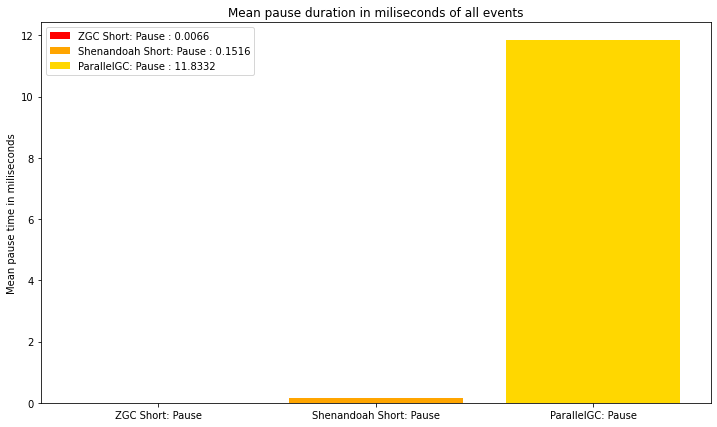

In [30]:

from new_graphing import bar_avg

graph = bar_avg(gc_event_dataframes, group_by = "EventType", filter_by = [("EventType", "Pause")], labels = labels)
_ = graph.set_title("Mean pause duration in miliseconds of all events")
_ = graph.set_ylabel("Mean pause time in miliseconds")


## Heap allocation used before & after GC

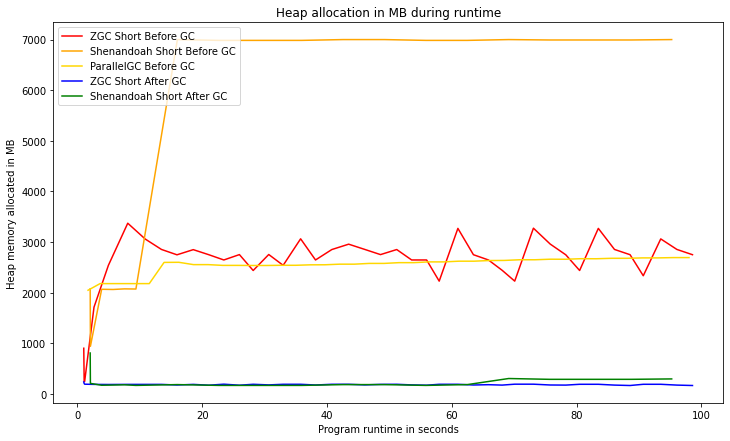

In [31]:
from new_graphing import line

graph = line(gc_event_dataframes,
            group_by = None, 
            filter_by = [("HeapBeforeGC", None)],
            labels = [label + " Before GC" for label in labels], 
            column = "HeapBeforeGC")

graph = line(gc_event_dataframes,
            group_by = None, 
            filter_by = [("HeapAfterGC", None)],
            labels = [label + " After GC" for label in labels], 
            column = "HeapAfterGC", axs = graph, colors = ["blue", "green"])

_ = graph.set_title("Heap allocation in MB during runtime")
_ = graph.set_ylabel("Heap memory allocated in MB")
_ = graph.set_xlabel("Program runtime in seconds")

## MB reclaimed during GC during runtime

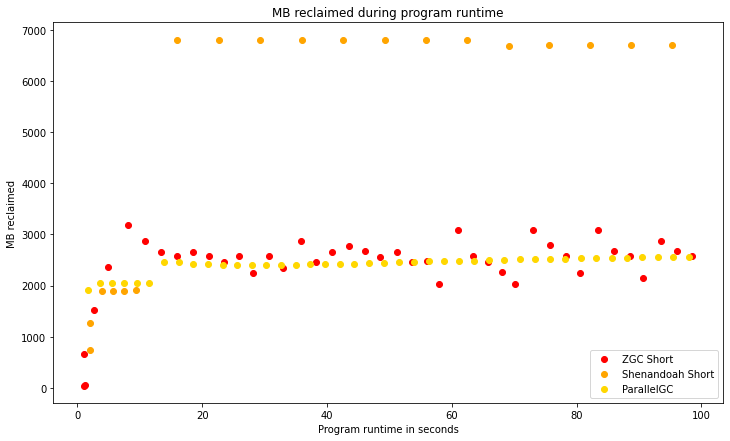

In [32]:
from new_graphing import reclaimed_bytes
filter_by = [("HeapBeforeGC", None), ("HeapAfterGC", None)]
graph = reclaimed_bytes(gc_event_dataframes, filter_by = filter_by, labels = labels)
_ = graph.set_title("MB reclaimed during program runtime")
_ = graph.set_ylabel("MB reclaimed")
_ = graph.set_xlabel("Program runtime in seconds")


## Heatmaps for each log

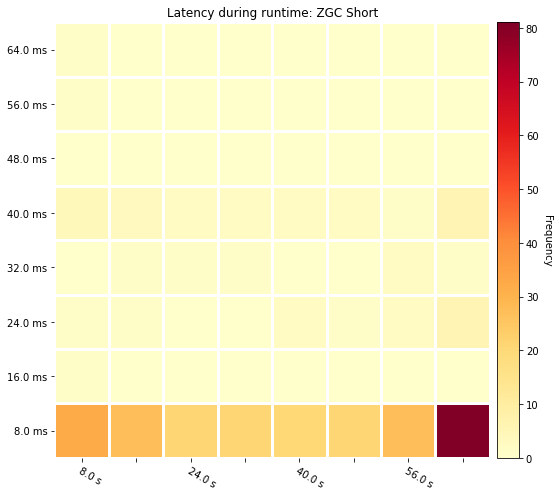

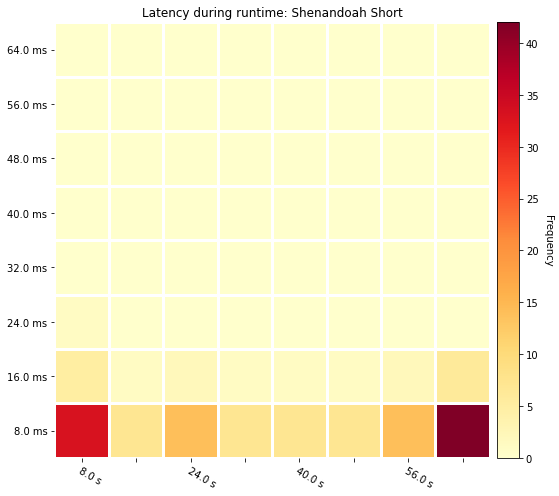

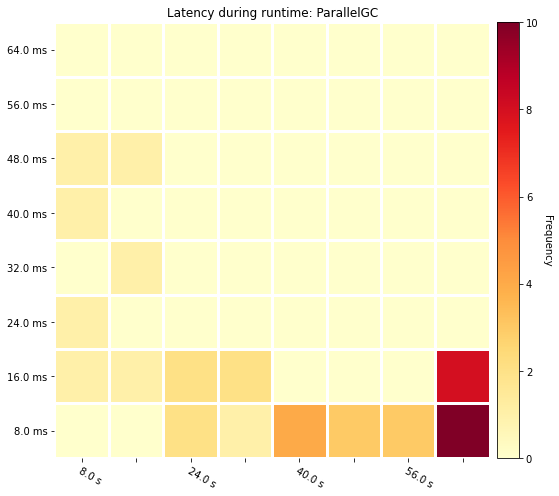

In [33]:
from src.graphing.heatmap import plot_heatmap
import src.transform as transform
for label, gc_event_dataframe in zip(labels, gc_event_dataframes):
    
    heatmap, dimensions = transform.get_heatmap_data(gc_event_dataframe, 8,8,8,8, True)                                                                                   # Set true to false 
#plot_heatmap(heatmap, dimensions, True)
    graph = plot_heatmap(heatmap, dimensions, False)
    graph.set_title("Latency during runtime: " +  label)
plt.rcParams["figure.figsize"] = [12, 7]